<a href="https://colab.research.google.com/github/shadmanshakib09/Statistics/blob/main/Statistics_Part03.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Lets see, how can we do feature selection based on PDF (Probability Density Function)

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [3]:
df = sns.load_dataset('iris')
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


<Axes: xlabel='sepal_length', ylabel='Density'>

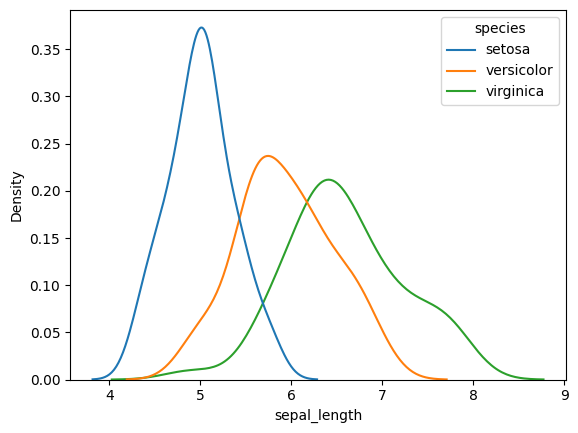

In [4]:
sns.kdeplot(data=df, x='sepal_length', hue='species')

<Axes: xlabel='sepal_width', ylabel='Density'>

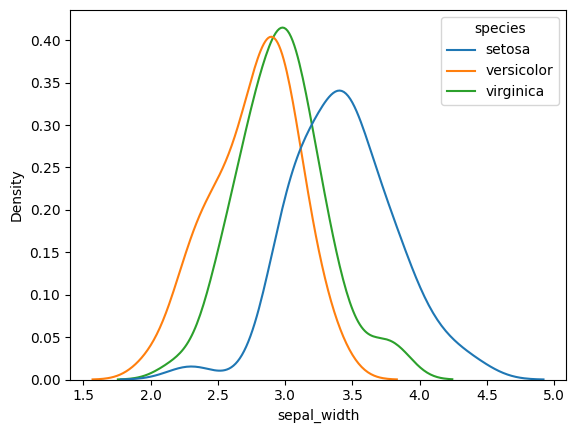

In [5]:
sns.kdeplot(data=df, x='sepal_width', hue='species')

<Axes: xlabel='petal_length', ylabel='Density'>

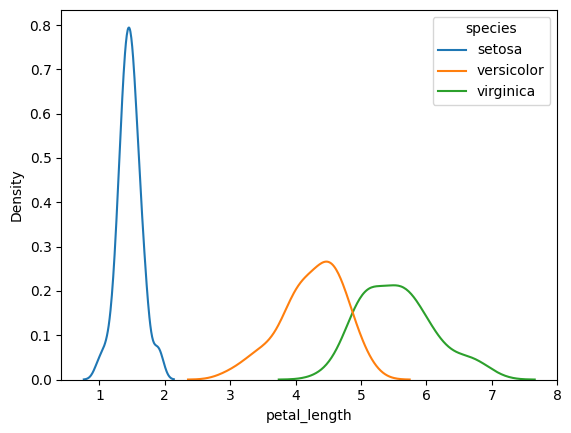

In [6]:
sns.kdeplot(data=df, x='petal_length', hue='species')

<Axes: xlabel='petal_width', ylabel='Density'>

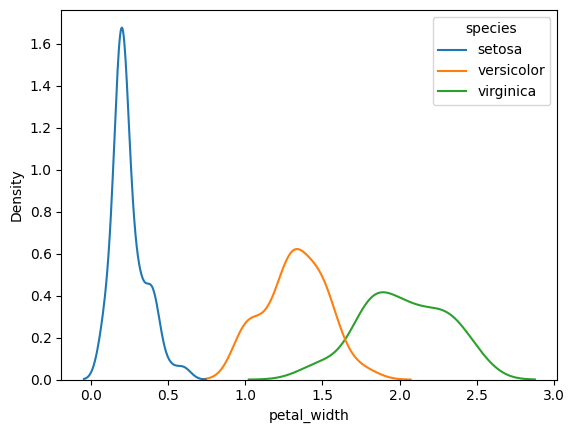

In [7]:
sns.kdeplot(data=df, x='petal_width', hue='species')

So, from these plot we can say that, petal length and petal width is more differentiable and we can use both the features

# Now we will see Covariance and Correlation

In [8]:
#covariance
x = pd.Series(df['sepal_length'])
y = pd.Series(df['petal_length'])
x.cov(y)

1.2743154362416111

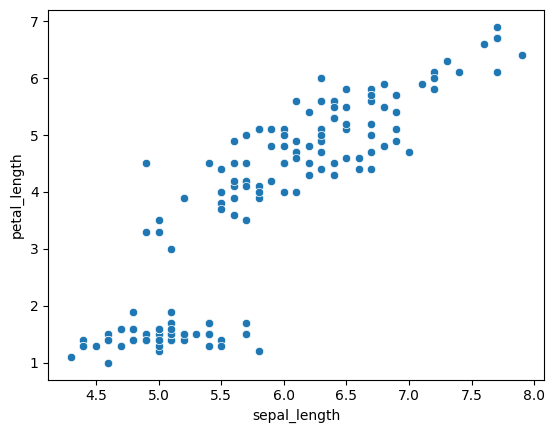

In [11]:
#scatter plot
ax = sns.scatterplot(data=df, x='sepal_length', y='petal_length')

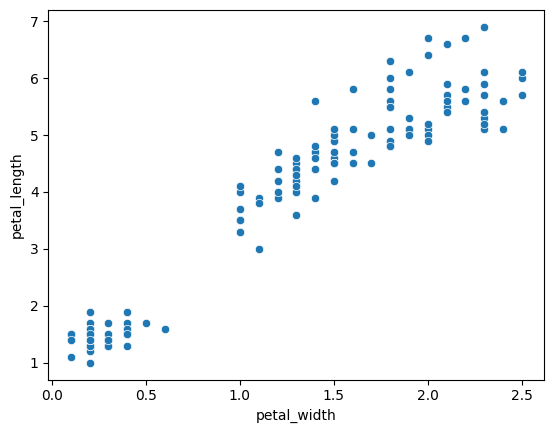

In [12]:
ax = sns.scatterplot(data=df, x='petal_width', y='petal_length')

In [13]:
#covariance
x1 = pd.Series(df['petal_width'])
y1 = pd.Series(df['petal_length'])
x1.cov(y1)

1.2956093959731547

In [14]:
#correlation
x.corr(y)

0.8717537758865831

In [16]:
x1.corr(y1) # this is more positively correlated data than x,y

0.9628654314027961

Lets see some issue with co-variance

In [17]:
a = pd.Series([12,25,68,42,113])
b = pd.Series([11,29,58,121,100])

In [19]:
df= pd.DataFrame({'a':a, 'b':b})
df

,a,b
0,12,11
1,25,29
2,68,58
3,42,121
4,113,100


Text(0.5, 1.0, 'Covariance - 4595.0')

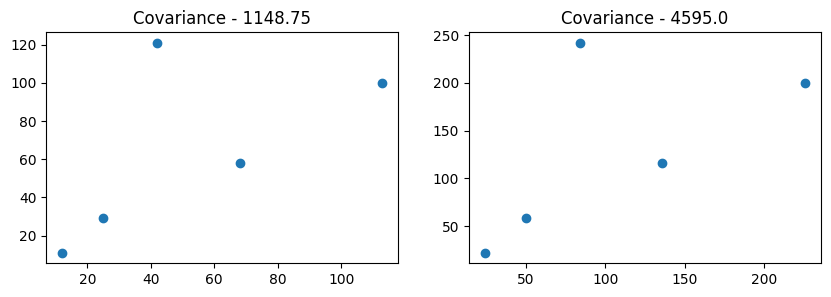

In [28]:
fig, (ax1, ax2) = plt.subplots(1,2, figsize=(10,3))
ax1.scatter(df['a'],df['b'])
ax2.scatter(df['a']*2,df['b']*2)
ax1.set_title("Covariance - "+ str(np.cov(df['a'],df['b'])[0,1]))
ax2.set_title("Covariance - "+ str(np.cov(df['a']*2,df['b']*2)[0,1]))

Text(0.5, 1.0, 'Covariance - 4595.0')

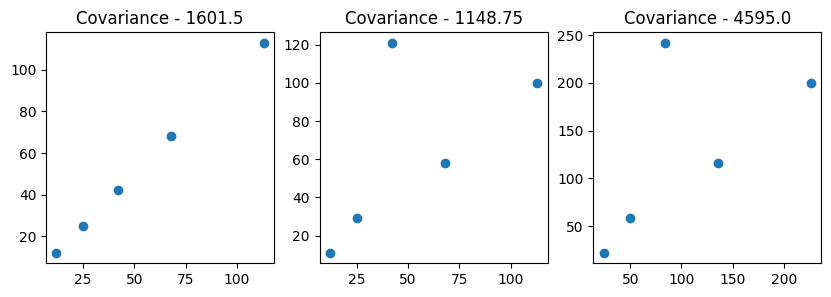

In [30]:
fig, (ax1, ax2,ax3) = plt.subplots(1,3, figsize=(10,3))
ax1.scatter(df['a'],df['a'])
ax2.scatter(df['a'],df['b'])
ax3.scatter(df['a']*2,df['b']*2)
ax1.set_title("Covariance - "+ str(np.cov(df['a'],df['a'])[0,1]))
ax2.set_title("Covariance - "+ str(np.cov(df['a'],df['b'])[0,1]))
ax3.set_title("Covariance - "+ str(np.cov(df['a']*2,df['b']*2)[0,1]))

***The covariance for 1st graph will be higher than 2nd graph and this is logical as the data in 1st graph is more positively covariated. But the 3rd graph is same as 2nd graph, just scaled by 2. Here is the problem arise and we can see that the covariance in 3rd graph is higher than 1st graph and this is not logical. so covariance doesnot tells the exact story of data, it just tells us the direction of data.***

Here comes **correlation**

Text(0.5, 1.0, 'Correlation - 0.6185423626205997')

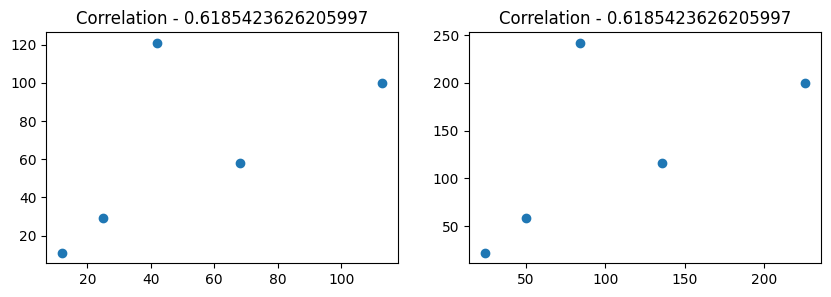

In [33]:
fig, (ax1, ax2) = plt.subplots(1,2, figsize=(10,3))
ax1.scatter(df['a'],df['b'])
ax2.scatter(df['a']*2,df['b']*2)
ax1.set_title("Correlation - "+ str(df['a'].corr(df['b'])))
ax2.set_title("Correlation - "+ str((df['a']*2).corr(df['b']*2))) #see the correlation score is same and it should be same.

Text(0.5, 1.0, 'Correlation - 0.6185423626205997')

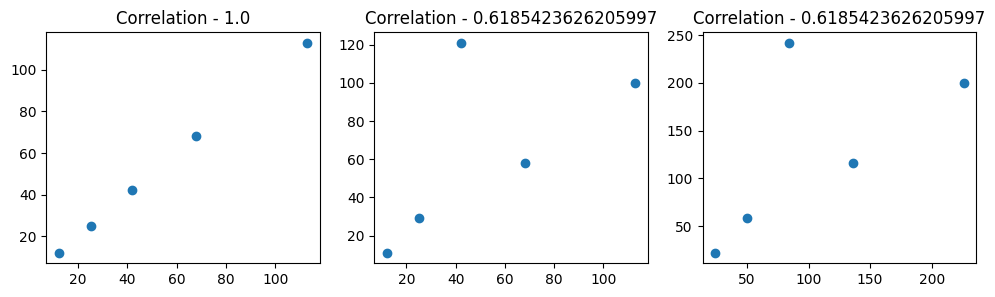

In [36]:
fig, (ax1, ax2,ax3) = plt.subplots(1,3, figsize=(12,3))
ax1.scatter(df['a'],df['a'])
ax2.scatter(df['a'],df['b'])
ax3.scatter(df['a']*2,df['b']*2)
ax1.set_title("Correlation - "+ str(df['a'].corr(df['a'])))
ax2.set_title("Correlation - "+ str(df['a'].corr(df['b'])))
ax3.set_title("Correlation - "+ str((df['a']*2).corr(df['b']*2))) #see the correlation score is same and it should be same.

In [37]:
#Thanks to CampusX Youtube Channel